In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay

In [2]:
df = pd.read_csv("/content/dataset.csv")

In [3]:
df.drop(columns = 'education', inplace = True)

In [4]:
df.isna().sum().sort_values(ascending = False)

,0
glucose,388
BPMeds,53
totChol,50
cigsPerDay,29
BMI,19
heartRate,1
male,0
age,0
currentSmoker,0
prevalentStroke,0


In [5]:
df.dropna(inplace=True)

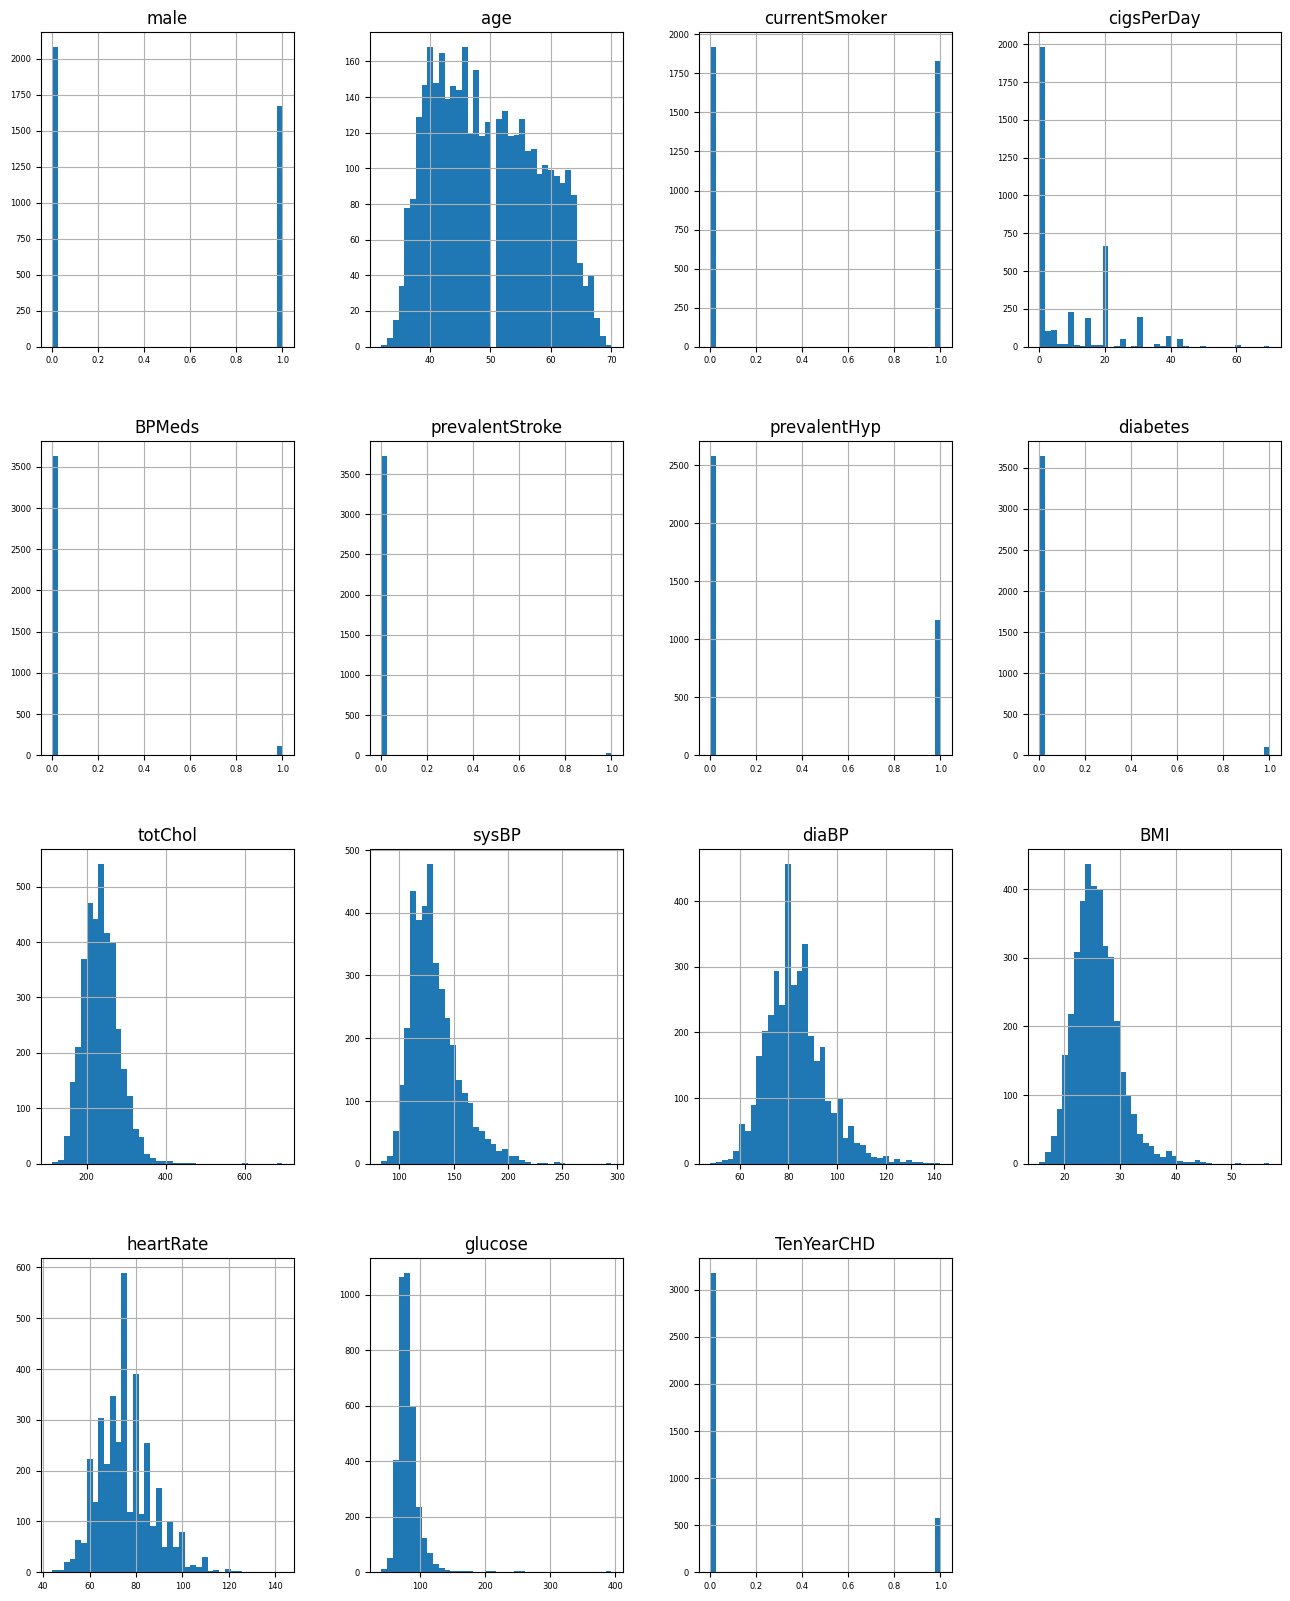

In [6]:
df.hist(figsize=(16, 20), bins=40, xlabelsize=6, ylabelsize=6);

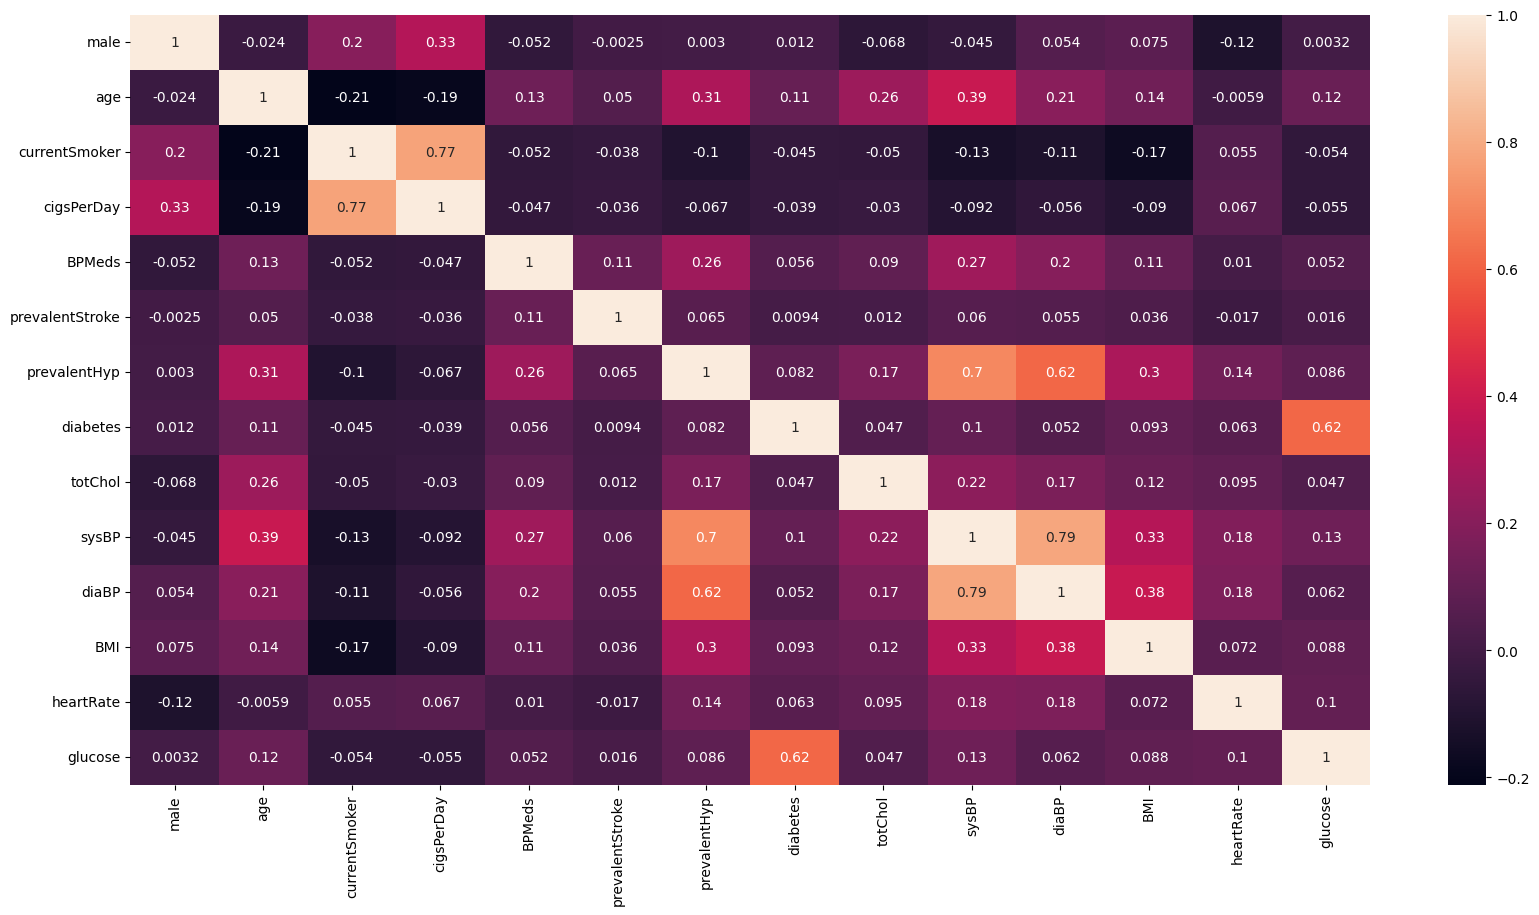

In [7]:
corr = df.drop(columns= 'TenYearCHD').corr()
fig , ax = plt.subplots(figsize=(20 , 10))
sns.heatmap(corr ,annot= True , ax=ax);

In [8]:
X = df.drop(columns=['TenYearCHD'])
y = df['TenYearCHD']

In [10]:
X_train , X_test , y_train , y_test = train_test_split(X ,y ,test_size=0.2 , random_state=42 )

In [11]:

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2999, 14)
y_train shape: (2999,)
X_test shape: (750, 14)
y_test shape: (750,)


In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
model=LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [14]:
y_testing_pred = model.predict(X_test)
testing_acc = accuracy_score(y_test, y_testing_pred)
print(f"Testing accuracy : {testing_acc: .4f}")

Testing accuracy :  0.8440


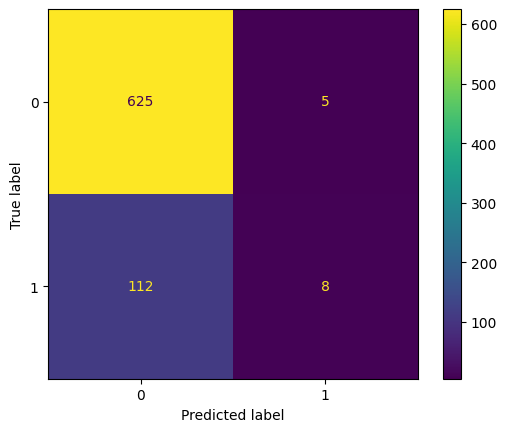

In [15]:
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)

In [16]:
print(classification_report(y_test , model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       630
           1       0.62      0.07      0.12       120

    accuracy                           0.84       750
   macro avg       0.73      0.53      0.52       750
weighted avg       0.81      0.84      0.79       750



In [17]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function
def cost_function(x, y, w, b):
    m = len(y)
    z = np.dot(x, w) + b
    h = sigmoid(z)
    cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

# Gradient descent function
def gradient_descent(x, y, w, b, alpha, epochs):
    m = len(y)
    cost_history = []
    for _ in range(epochs):
        z = np.dot(x, w) + b
        h = sigmoid(z)
        dw = (1 / m) * np.dot(x.T, (h - y))
        db = (1 / m) * np.sum(h - y)
        w -= alpha * dw
        b -= alpha * db
        cost = cost_function(x, y, w, b)
        cost_history.append(cost)
    return w, b, cost_history

In [18]:
w = np.zeros(X_train.shape[1])
b = 0
alpha = 0.1  # Increased learning rate for better convergence
epochs = 5000  # Increased iterations for better optimization

# Train model using gradient descent
w, b, cost_history = gradient_descent(X_train, y_train, w, b, alpha, epochs)

In [19]:
def predict(x, w, b):
    return sigmoid(np.dot(x, w) + b) >= 0.5

y_pred = predict(X_test, w, b)
print("Accuracy score=", "{:.2f}".format(accuracy_score(y_test, y_pred) * 100))
print("Confusion matrix=\n", confusion_matrix(y_test, y_pred))
print("Classification report=\n", classification_report(y_test, y_pred))

Accuracy score= 84.40
Confusion matrix=
 [[625   5]
 [112   8]]
Classification report=
               precision    recall  f1-score   support

           0       0.85      0.99      0.91       630
           1       0.62      0.07      0.12       120

    accuracy                           0.84       750
   macro avg       0.73      0.53      0.52       750
weighted avg       0.81      0.84      0.79       750

